In [86]:
import numpy as np
import matplotlib.pyplot as plt

from astroML.time_series import lomb_scargle, lomb_scargle_BIC, lomb_scargle_bootstrap

%matplotlib inline

/usr/local/lib/python3.7/site-packages/astroML/time_series/periodogram.py:8: UserWarning: Using slow version of lomb_scargle. Install astroML_addons to use an optimized version
  warnings.warn("Using slow version of lomb_scargle. Install astroML_addons "


In [16]:
training_data = np.genfromtxt("../data/training_set.csv", delimiter=',', names=True)
training_meta = np.genfromtxt("../data/training_set_metadata.csv", delimiter=',', names=True)

print("Training data")
print(training_data.shape)
print(training_data.dtype.names)

print()

print("Training meta data")
print(training_meta.shape)
print(training_meta.dtype.names)

Training data
(1421705,)
('object_id', 'mjd', 'passband', 'flux', 'flux_err', 'detected')

Training meta data
(7848,)
('object_id', 'ra', 'decl', 'gal_l', 'gal_b', 'ddf', 'hostgal_specz', 'hostgal_photoz', 'hostgal_photoz_err', 'distmod', 'mwebv', 'target')


### Plot the class distribution of objects

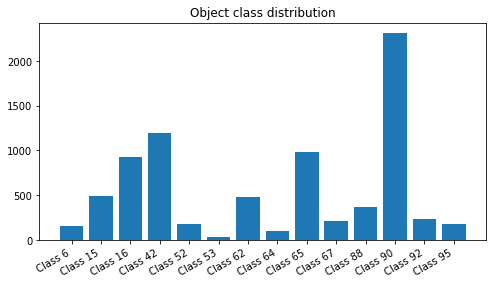

In [18]:
classes = np.unique(training_meta['target'])
classes_str = ["Class "+str(int(cl)) for cl in classes]
N_classes = len(classes)

counter = []
for i in range(N_classes):
    counter.append(len(training_meta[training_meta['target']==classes[i]]))

    
plt.figure(figsize=(8,4))

plt.bar(range(N_classes), counter)
ax = plt.gca()

ax.set_xticks(range(N_classes))
ax.set_xticklabels(classes_str)
for label in ax.get_xmajorticklabels():
    label.set_rotation(30)
    label.set_horizontalalignment("right")

plt.title("Object class distribution")
    
plt.show()

### Plot the redshift distribution of classes

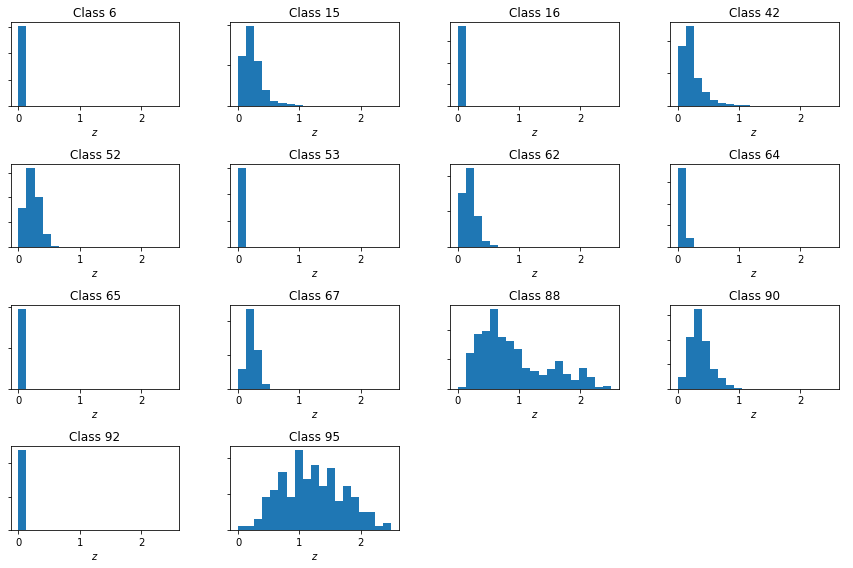

In [37]:
fig, ax = plt.subplots(4, 4, figsize=(12, 8))

bins = np.linspace(0, 2.5, 20)

for i in range(N_classes):
    ix = i%4
    iy = int(i/4)

    ax[iy,ix].hist(training_meta['hostgal_specz'][training_meta['target'] == classes[i]], bins=bins)
    ax[iy,ix].set_title(classes_str[i])
    ax[iy,ix].set_yticklabels([])
    ax[iy,ix].set_xlabel('$z$')
    
ax[3,2].axis('off')
ax[3,3].axis('off')

    
plt.tight_layout()
plt.show()

### Number of data points per object per filter

In [109]:
obj_ids = np.unique(training_data['object_id'])

N_obs_0 = []
N_obs_1 = []
N_obs_2 = []
N_obs_3 = []
N_obs_4 = []
N_obs_5 = []

for obj_id in obj_ids:
    
    data_obj = training_data[training_data['object_id'] == obj_id]
    
    for i, N_obs in enumerate([N_obs_0,N_obs_1,N_obs_2,N_obs_3,N_obs_4,N_obs_5]):
        N_obs.append(len(data_obj[data_obj['passband'] == i]))

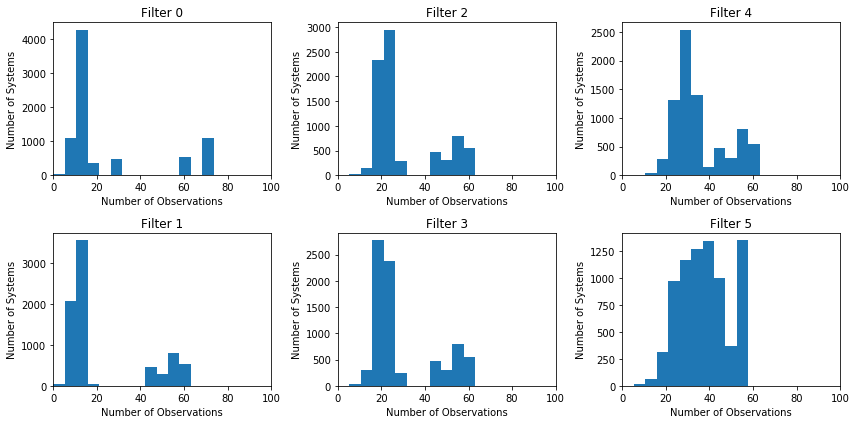

In [115]:
fig, ax = plt.subplots(2, 3, figsize=(12, 6))

N_obs = [N_obs_0,N_obs_1,N_obs_2,N_obs_3,N_obs_4,N_obs_5]

bins = np.linspace(0, 100, 20)

for i in range(3):
    for j in range(2):
        i_filter = 2*i+j

        ax[j,i].hist(N_obs[i_filter], bins=bins)
        
        ax[j,i].set_xlabel('Number of Observations')
        
        ax[j,i].set_title('Filter '+str(i_filter))
        ax[j,i].set_ylabel('Number of Systems')
        
        ax[j,i].set_xlim(0, 100)
        
plt.tight_layout()
plt.show()

### Plotting functions

In [117]:
def plot_lightcurve(obj_id, xrange=None):
    
    fig, ax = plt.subplots(2, 3, figsize=(12, 6))
    
    data_obj = training_data[training_data['object_id'] == obj_id]
    
    for i in range(3):
        for j in range(2):
            i_filter = 2*i+j

            idx = np.where(data_obj['passband'] == i_filter)[0]
                    
            ax[j,i].errorbar(data_obj['mjd'][idx], data_obj['flux'][idx], yerr=data_obj['flux_err'][idx],
                             fmt='o', marker='.', ecolor='k', markersize=10)
            
            ax[j,i].set_title('Filter '+str(int(i_filter)))
            
            if not xrange is None:
                ax[j,i].set_xlim(xrange[0], xrange[1])
                    
    plt.tight_layout()
    plt.show()
    
    
def plot_periodogram(obj_id):
    
    fig, ax = plt.subplots(2, 3, figsize=(12, 6))
    
    data_obj = training_data[training_data['object_id'] == obj_id]
    
    for i in range(3):
        for j in range(2):
            i_filter = 2*i+j

            idx = np.where(data_obj['passband'] == i_filter)[0]
            
            t = data_obj['mjd'][idx]
            y_obs = data_obj['flux'][idx]
            dy = data_obj['flux_err'][idx]

            period = 10 ** np.linspace(-1, 2, 1000)
            omega = 2 * np.pi / period
            PS = lomb_scargle(t, y_obs, dy, omega, generalized=True)

            ax[j,i].plot(period, PS, '-', c='black', lw=1, zorder=1)
                        
            ax[j,i].set_title('Filter '+str(int(i_filter)))
            
    plt.tight_layout()
    plt.show()

### Plot lightcurves and periodograms for one example from each class

Class 6


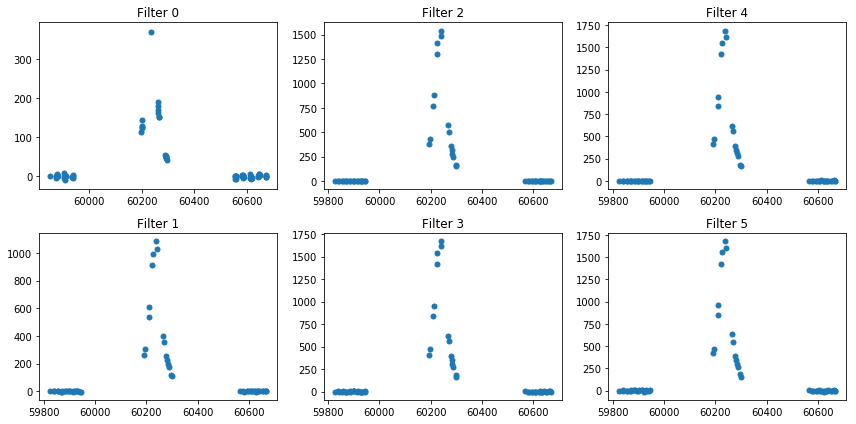

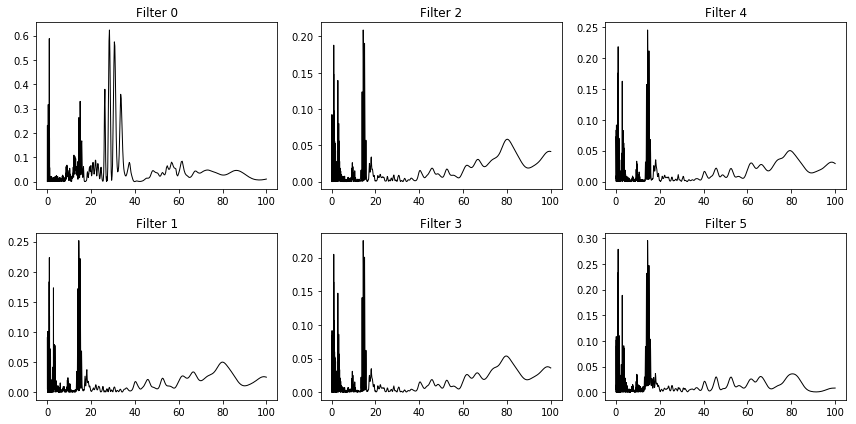

Class 15


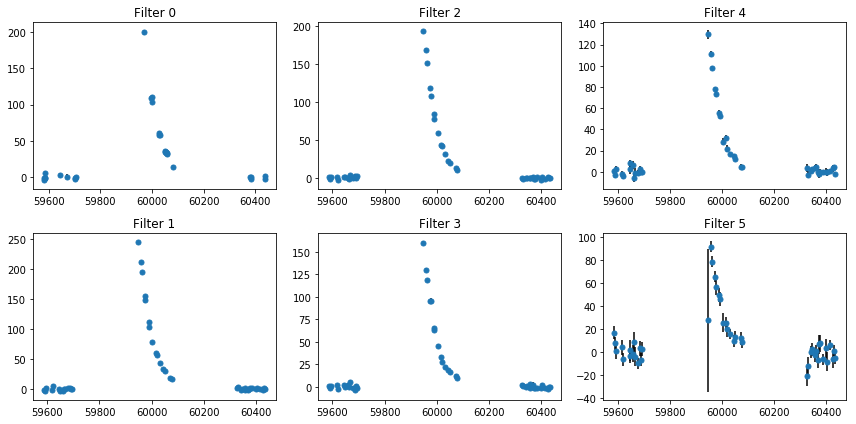

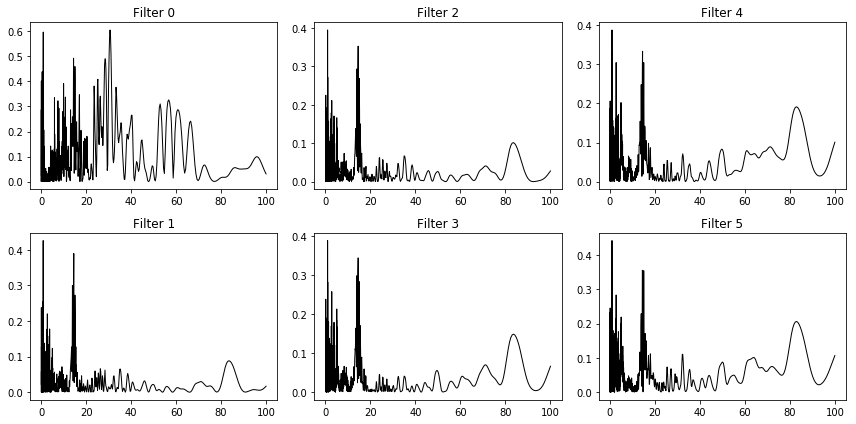

Class 16


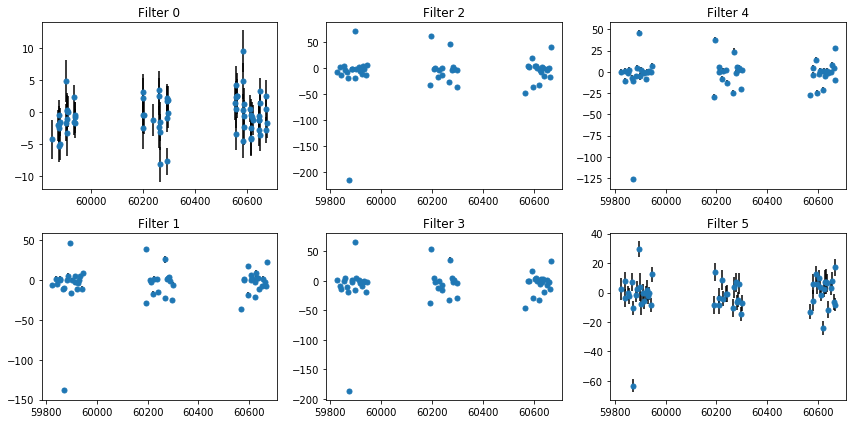

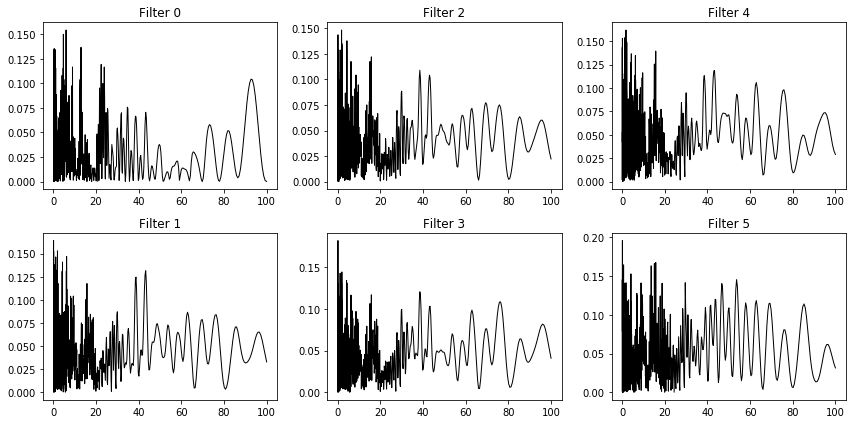

Class 42


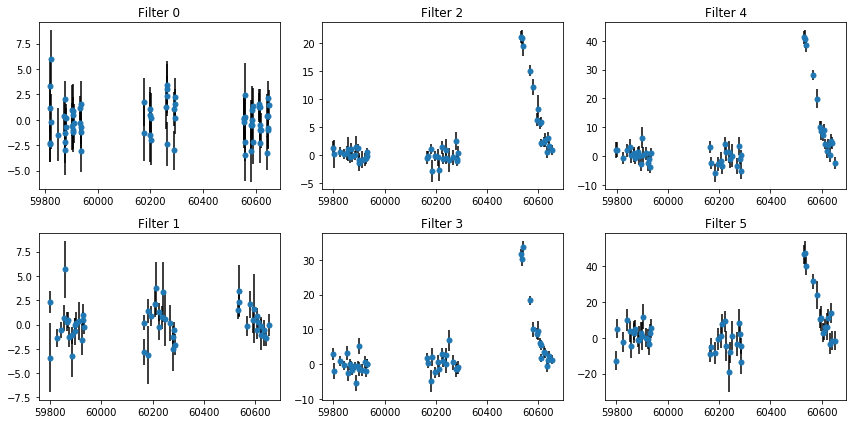

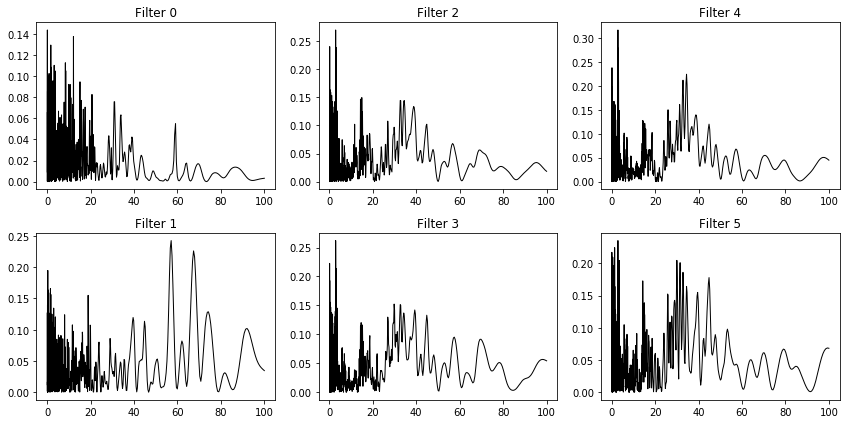

Class 52


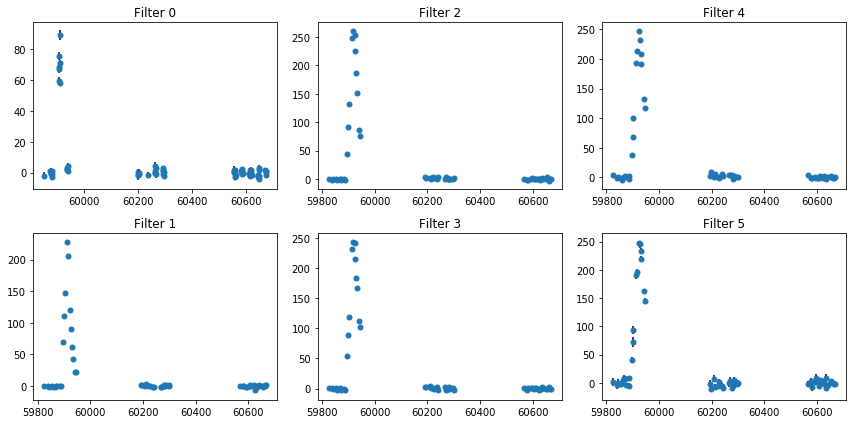

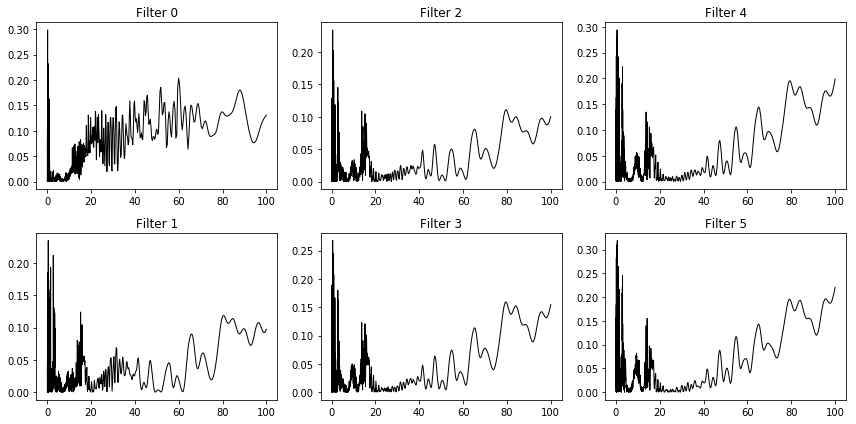

Class 53


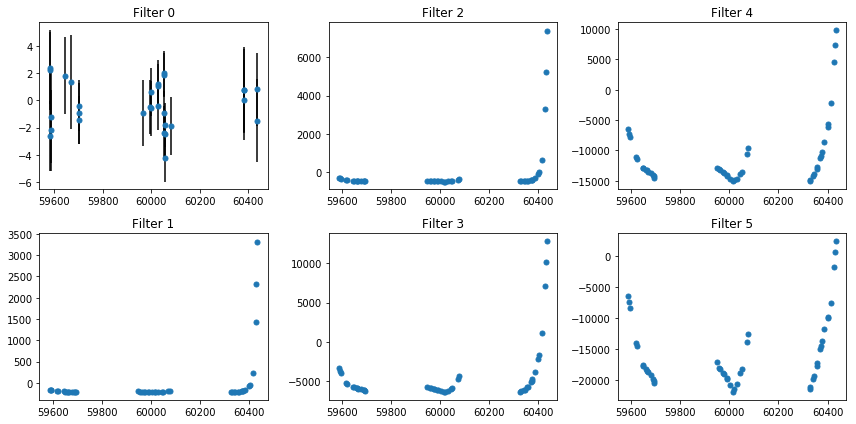

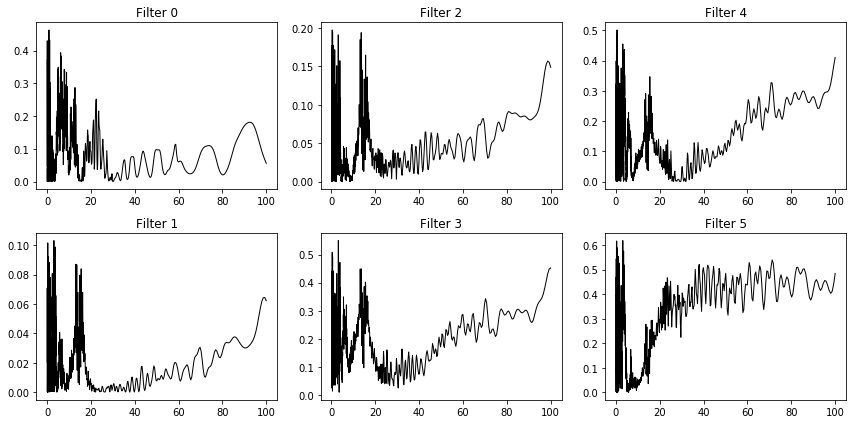

Class 62


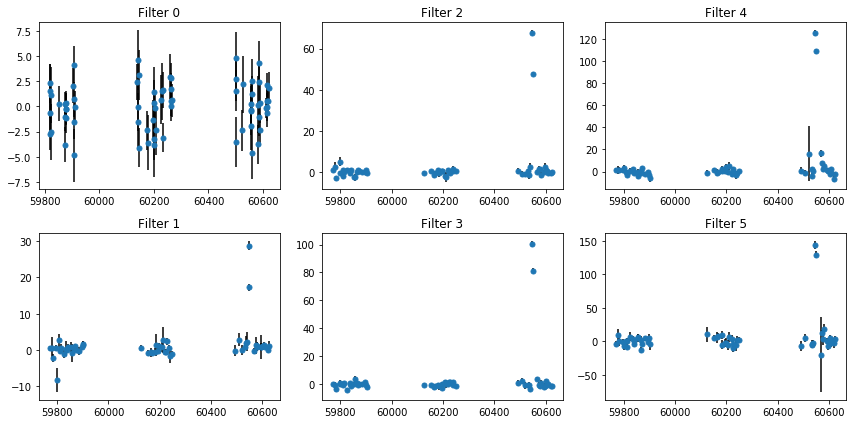

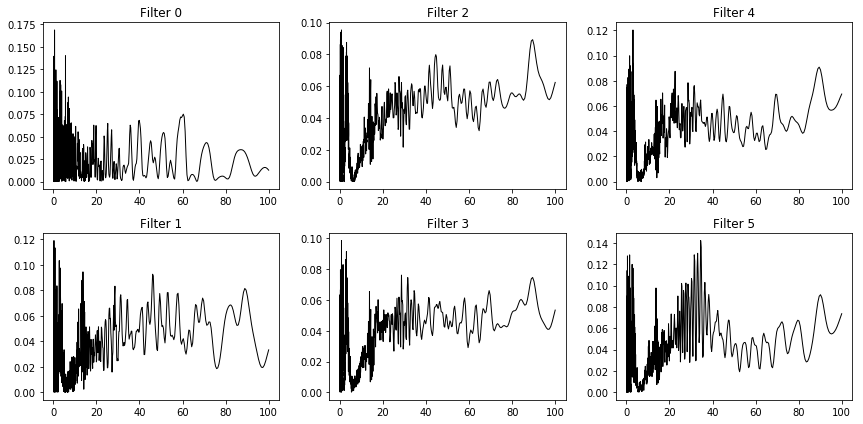

Class 64


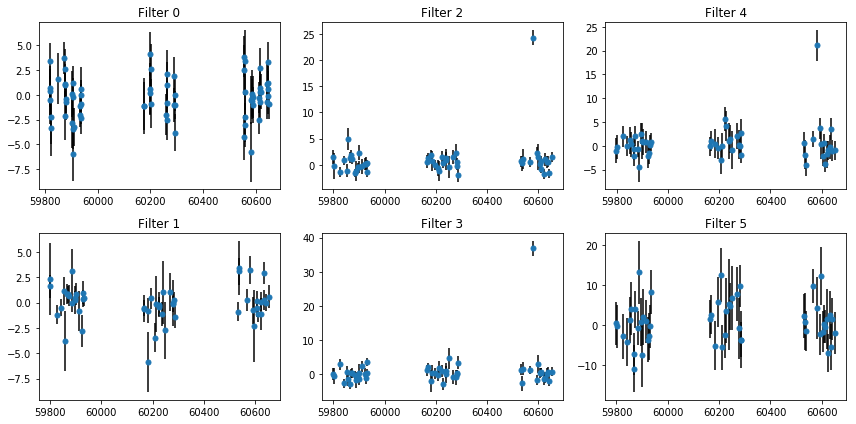

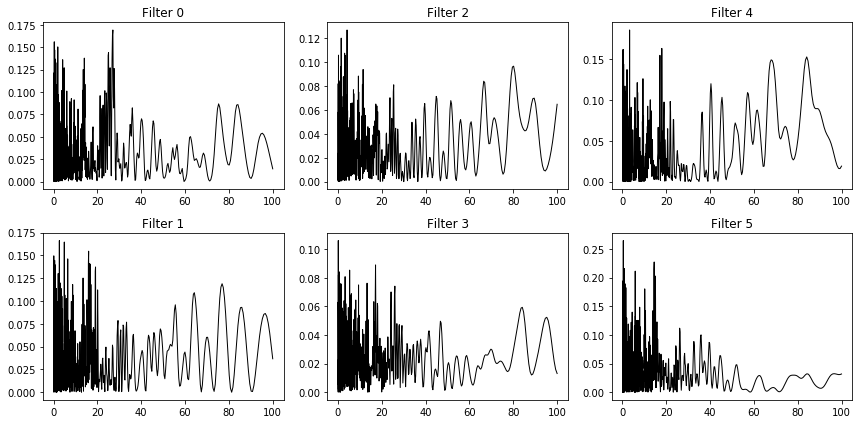

Class 65


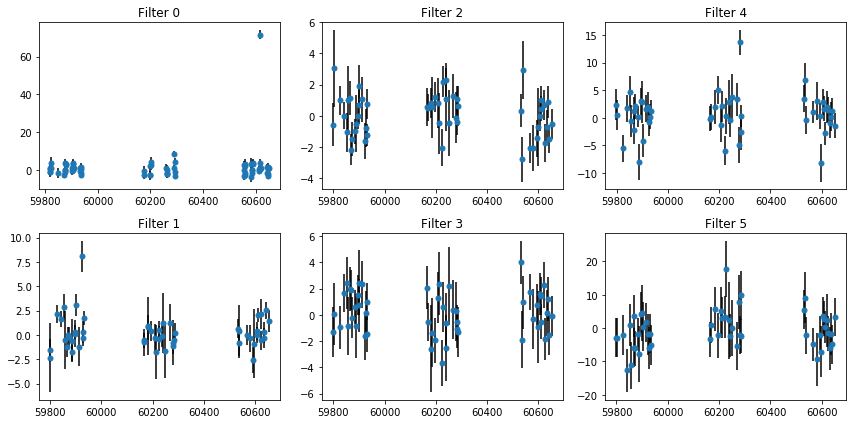

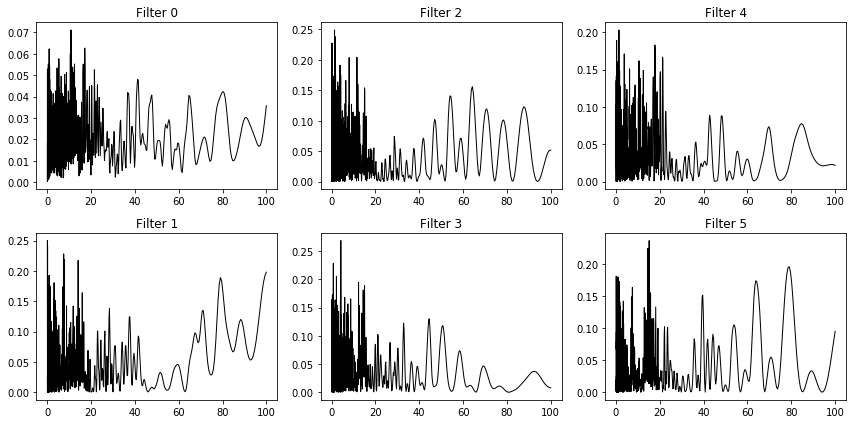

Class 67


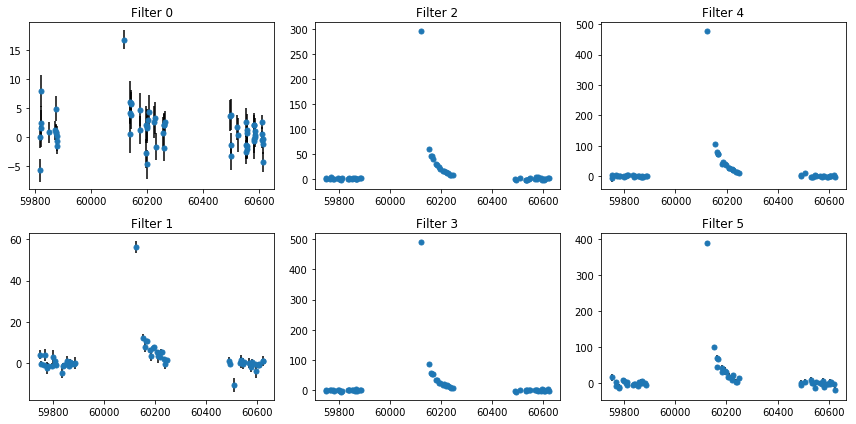

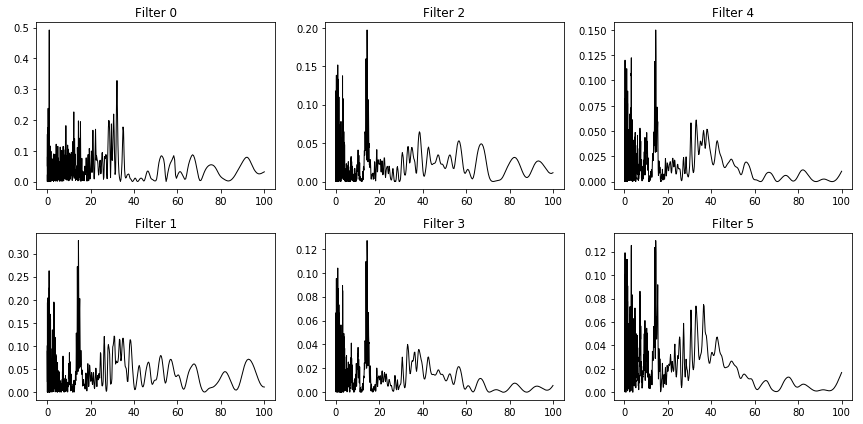

Class 88


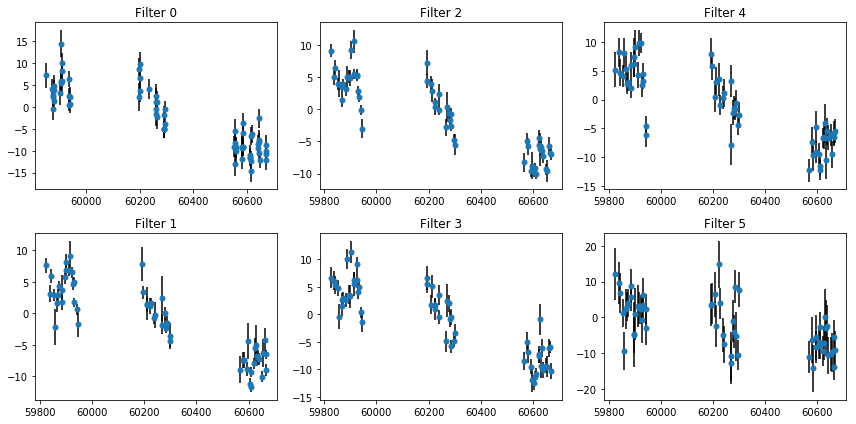

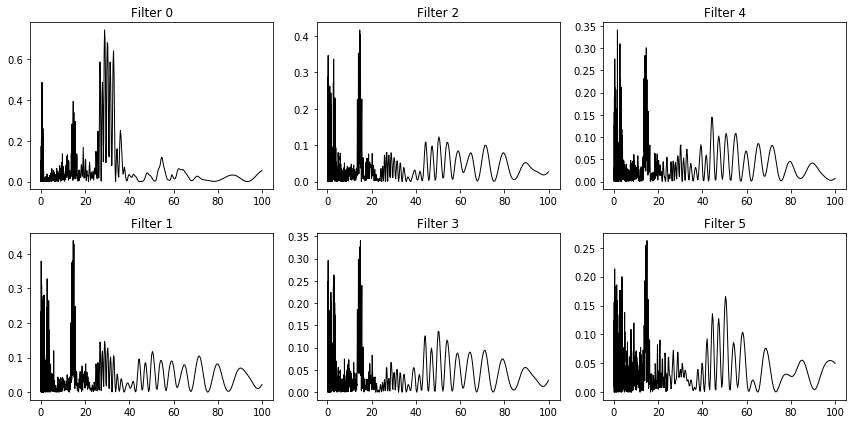

Class 90


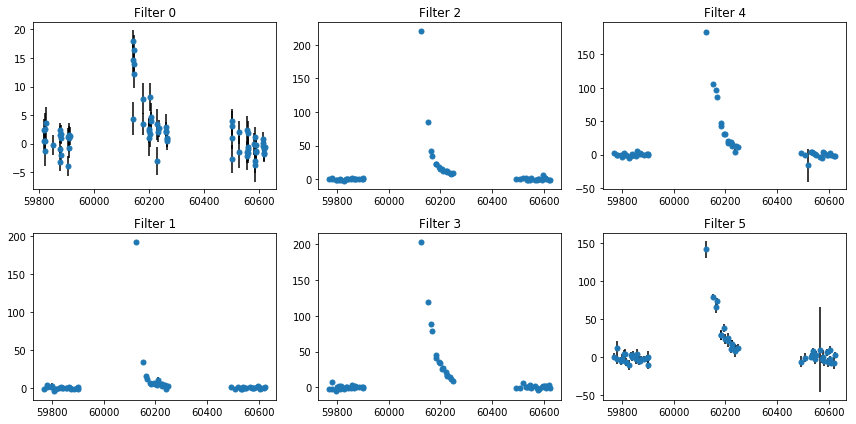

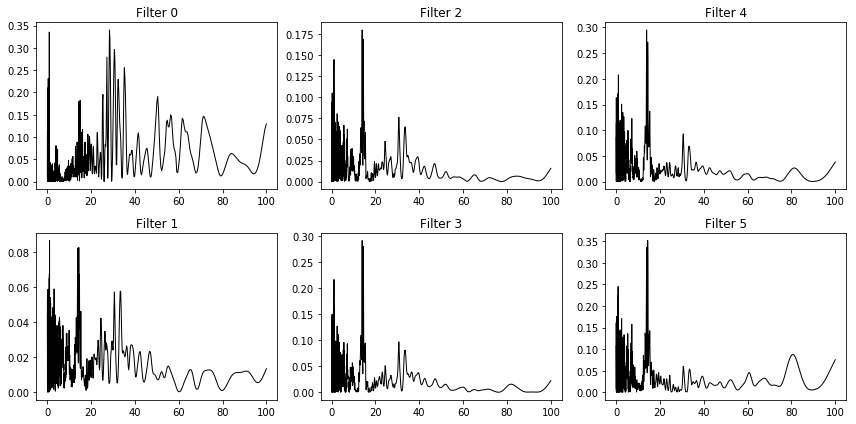

Class 92


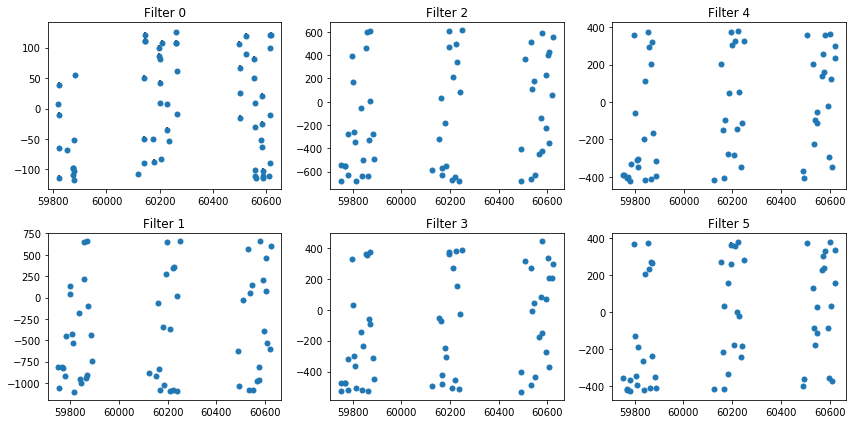

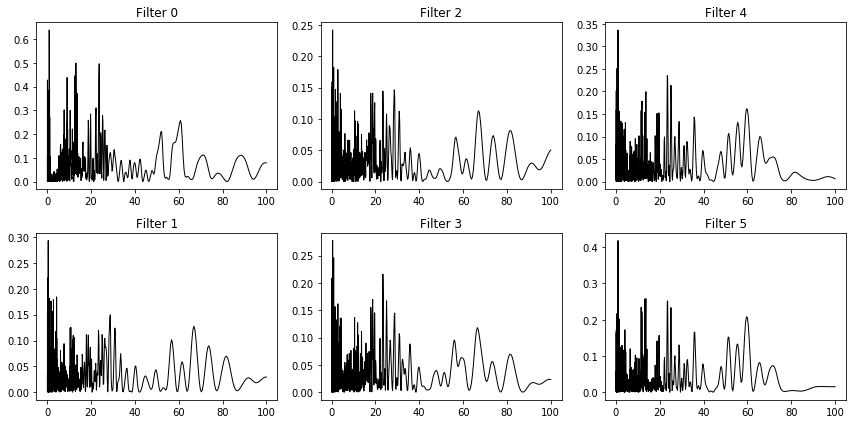

Class 95


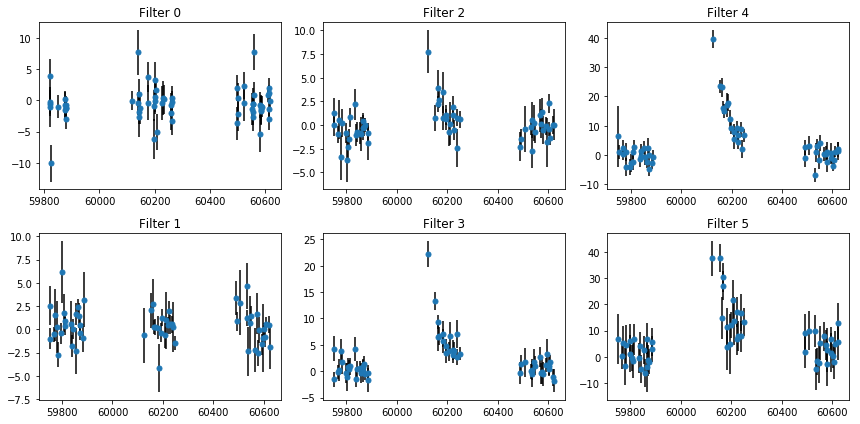

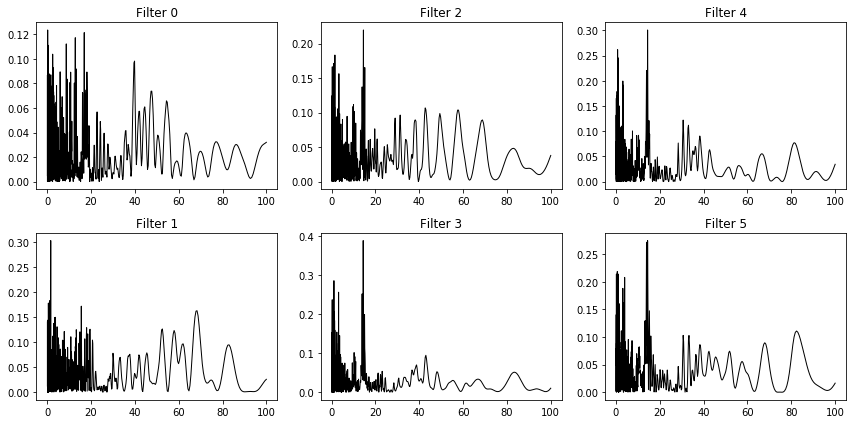

In [136]:
for i in range(14):
    
    print("Class " + str(int(classes[i])))
    
    idx = int(np.unique(training_meta['object_id'][training_meta['target'] == classes[i]])[0])

    plot_lightcurve(idx)
    plot_periodogram(idx)